# Collaboration and Competition

---

In this notebook, we will solve the Unity ML-Agents environment "Tennis" for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Test the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# External libraries
from unityagents import UnityEnvironment
import numpy as np
import torch

# Our code base
import env
import agent
import run

### 2. Explanations of State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

The hyperparameters used appear in 'agent.py', and the final hyperparameters are also copied below:
```
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
UPDATE_EVERY = 4        # timesteps between updates
NUM_UPDATES = 2         # num of update passes when updating
NOISE_START = 1.0       # epsilon decay for the noise process added to the actions
NOISE_DECAY = 1e-6      # decay for for subrtaction of noise
NOISE_SIGMA = 0.2       # sigma for Ornstein-Uhlenbeck noise
```
Environment and model details will be printed below.


### 3. Now to solve the task

In [2]:
# create environment and agent, then run training
environment = env.UnityMultiAgent() # CHANGE this filename based on your platform
agent = agent.MADDPG()
stats = run.train(environment, agent, notebook=True)

# Scores for plotting below
scores = stats.scores 
averages = stats.avg_scores

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Actor(
  (bn0): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)
Critic(
  (bn0): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fcs1): Linear(in_features=48, out_features=512, bias=True)
  (fc2): Linear(in_features=516, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1, bias=True)
)
Actor(
  (bn0): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): 

### 4. Plot of the scores and average scores

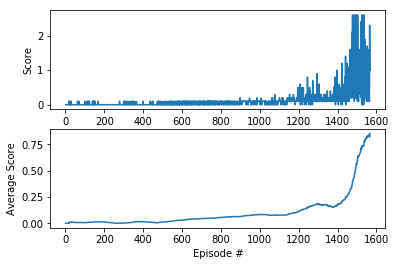

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(scores)+1), averages)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show()